<a href="https://colab.research.google.com/github/lupis30puc/bipm_text_analytics_exercises/blob/main/exercise_7__social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install  preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4478 sha256=214a3f4b81275a69c7fc725d252a9caca9c5d2e69a8a988ece49c521f4ac6e31
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [ ]:
pip install tweet-preprocessor

## Part A. Test preprocessing

In [ ]:
import nltk
import numpy as np
import pandas as pd
import inspect
import preprocessor
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot, distplot, heatmap
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocessor.api import clean
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
np.random.seed(42)
print(np.random.random())

0.3745401188473625


In [ ]:
result_ex = clean('CRAZY')
print(result_ex)

CRAZY


2. Download the Tweeter airline sentiment data from here
https://www.kaggle.com/crowdflower/twitter-airline-sentiment and import it as a data
frame df in python. What is this data about?

In [ ]:
uploaded = files.upload() 

Saving Tweets.csv to Tweets.csv


In [ ]:
#loading and getting information about the data set
df= pd.read_csv("Tweets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


3. Run the following code: countplot(x="airline_sentiment", data=df). What is it doing?
What does it tell about the data?

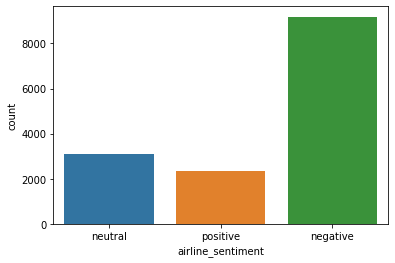

In [ ]:
# showing how many tweets are categorized in "negative", "positive" and "neutral"
countplot(x="airline_sentiment", data=df)

4. Run the following code: df['prep']=[clean(doc) for doc in df['text']]. What is it doing (Hint: You can use the inspect library on preprocessor.preprocess and preprocessor.defines.Patterns to find out.)

In [ ]:
#cleaning the actual tweet (killing accountnames for example)
df['prep']=[clean(doc) for doc in df['text']]
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it


In [ ]:
print(df.text[4])
print(df.prep[4])

@VirginAmerica and it's a really big bad thing about it
and it's a really big bad thing about it


## Part B: Sentiment analysis with NLP packages 

5. Add a column to df called 'sentiment_tb' containing the results from apply(lambda tweet: TextBlob(tweet).sentiment.polarity). What is this column doing? What is the distribution of its values (Hint: you can use describe() here).

In [ ]:
#calculating sentiments of the prepared tweets. -> -1 most negative, +1 most positve
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

df['sentiment_tb'] = df['prep'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000


In [ ]:
df['sentiment_tb'].describe()

count    14640.000000
mean         0.053555
std          0.320756
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          1.000000
Name: sentiment_tb, dtype: float64

6. Add a column to the data frame called 'sentiment_tb_desc', which value is as follows:


 ‘positive’, if ‘sentiment_tb'>0.5

 ‘negative’, if ‘sentiment_tb'<0.5

 ‘neutral’, else

In [ ]:
df['sentiment_tb_desc'] = 0

for e in range(len(df)):
  if df['sentiment_tb'][e] > 0.5:
    df['sentiment_tb_desc'][e] = 'positive'
  #elif df['sentiment_tb'][e] > 0 and df['sentiment_tb'][e] < 0.5:
  elif df['sentiment_tb'][e] < -0.5:
    df['sentiment_tb_desc'][e] = 'negative'
  else:
    df['sentiment_tb_desc'][e] = 'neutral'
#Is the classification of Neutral ok? Why 0 is not neutral? 
#Shouldn't we use an interval for neutral and not a single value?
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,sentiment_vd,sentiment_vd_desc,cluster,cluster_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,negative,0,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,negative,0,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,negative,0,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.5984,negative,0,neutral
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,0,neutral


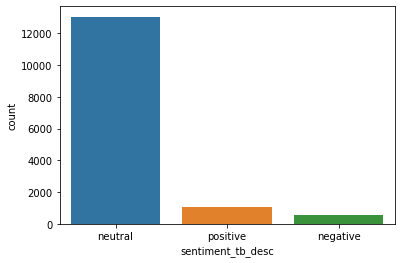

In [ ]:
# showing how many tweets are categorized in "negative", "positive" and "neutral"
countplot(x="sentiment_tb_desc", data=df)

7. Use classification_report similar to Exercise 6. to determine how good the column 'sentiment_tb_desc' predicts column ‘airline_sentiment’. Is this a good sentiment classifier?

In [ ]:
report_textblob = classification_report(df['sentiment_tb_desc'], df['airline_sentiment'])
print(report_textblob)
#It didn't predict well neutral and positive tweets. -> we have kind of okayish accuracy because a lot of tweets are categorized negative in general  

              precision    recall  f1-score   support

    negative       0.06      0.95      0.11       546
     neutral       0.94      0.22      0.36     13038
    positive       0.24      0.55      0.34      1056

    accuracy                           0.27     14640
   macro avg       0.41      0.57      0.27     14640
weighted avg       0.85      0.27      0.35     14640



8. Run the following code. What is it doing? Does it confirm the results from Question 7.?


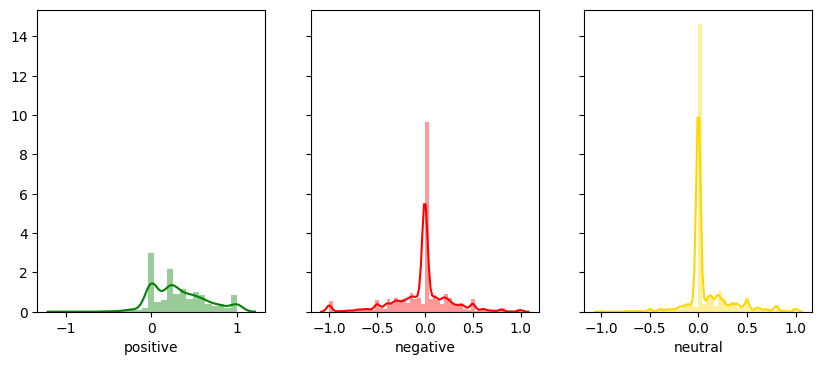

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_tb"] , color="green",
ax=axes[0], axlabel='positive')
sns.distplot(df.loc[df.airline_sentiment=='negative', "sentiment_tb"] , color="red",
ax=axes[1], axlabel='negative')
sns.distplot(df.loc[df.airline_sentiment=='neutral', "sentiment_tb"] , color="gold",
ax=axes[2], axlabel='neutral')
#The sentiment_tb classified the positive airline sentiment well.
#But the airline negative sentiment we classified some as positive and many as neutral.
#And the airline neutral sentiment is mostly classified well, except for some falsely positive ones...

## VADER

9. Run the following two lines. What are they doing? What is the distribution of the values of 'sentiment_vd'?

In [ ]:
# basically the same than previous? 
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_ex = df.copy()
df_ex.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


It interrupts the shortest paths for:
node D to node A, E and C

In [ ]:
df_ex['sentiment_vd_tweet'] = ''
for t in list(df_ex['text']):
    df_ex['sentiment_vd_tweet'] = str(sid.polarity_scores(t))
df_ex.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_vd_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp..."
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'comp..."


In [ ]:
# basically the same than previous? 
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
#Return a float for sentiment strength based on the input text. Positive values are positive valence, negative value are negative valence.
df['sentiment_vd'] = df['prep'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,sentiment_vd
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,negative,0.0000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,negative,0.0000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,negative,0.0000
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,negative,-0.5984
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,negative,-0.5829


10. Apply questions 6. to 8. to 'sentiment_vd'. Which package is better?

In [ ]:
df['sentiment_vd_desc'] = 0

for e in range(len(df)):
  if df['sentiment_vd'][e] > 0.5:
    df['sentiment_vd_desc'][e] = 'positive'
  elif df['sentiment_vd'][e] < -0.5:
    df['sentiment_vd_desc'][e] = 'negative'
  else:
    df['sentiment_vd_desc'][e] = 'neutral'

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,sentiment_vd,sentiment_vd_desc,cluster,cluster_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,0,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,0,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,0,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.5984,negative,0,neutral
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,0,neutral


In [ ]:
report_Vader = classification_report(df['airline_sentiment'], df['sentiment_vd_desc'])
print('report_textblob')
print(report_textblob)
print('report_Vader')
print(report_Vader)
#Is it very strange that the results are the same?

report_textblob
              precision    recall  f1-score   support

    negative       0.06      0.95      0.11       546
     neutral       0.94      0.22      0.36     13038
    positive       0.24      0.55      0.34      1056

    accuracy                           0.27     14640
   macro avg       0.41      0.57      0.27     14640
weighted avg       0.85      0.27      0.35     14640

report_Vader
              precision    recall  f1-score   support

    negative       0.95      0.21      0.34      9178
     neutral       0.26      0.81      0.39      3099
    positive       0.49      0.58      0.53      2363

    accuracy                           0.40     14640
   macro avg       0.56      0.53      0.42     14640
weighted avg       0.73      0.40      0.38     14640



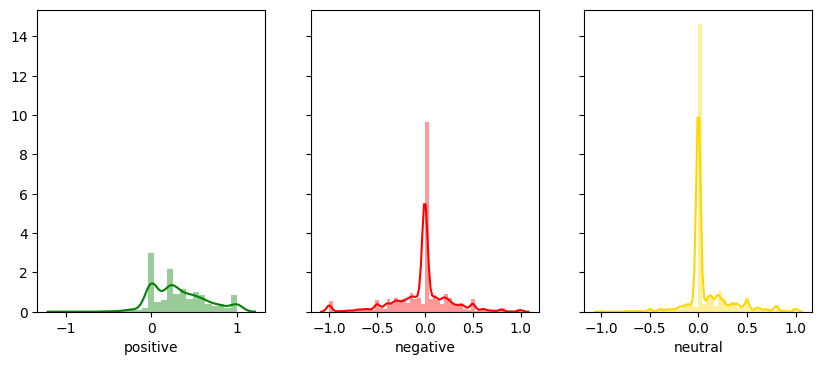

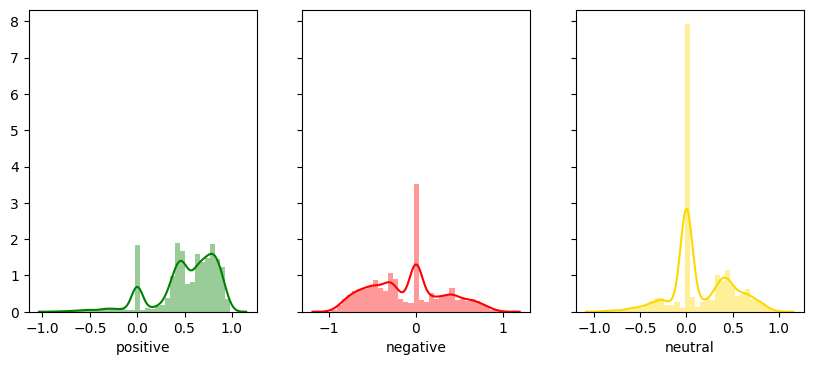

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_tb"] , color="green",
ax=axes[0], axlabel='positive')
sns.distplot(df.loc[df.airline_sentiment=='negative', "sentiment_tb"] , color="red",
ax=axes[1], axlabel='negative')
sns.distplot(df.loc[df.airline_sentiment=='neutral', "sentiment_tb"] , color="gold",
ax=axes[2], axlabel='neutral')

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_vd"] , color="green",
ax=axes[0], axlabel='positive')
sns.distplot(df.loc[df.airline_sentiment=='negative', "sentiment_vd"] , color="red",
ax=axes[1], axlabel='negative')
sns.distplot(df.loc[df.airline_sentiment=='neutral', "sentiment_vd"] , color="gold",
ax=axes[2], axlabel='neutral')

In [ ]:
#again it seems as the positive tweets were well clasified and the others are mixed between positive and its own...

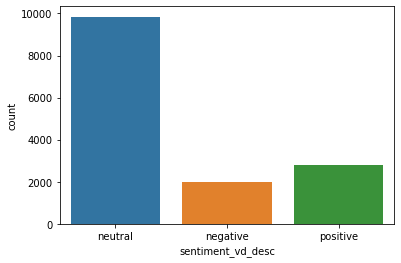

In [ ]:
# showing how many tweets are categorized in "negative", "positive" and "neutral"
countplot(x="sentiment_vd_desc", data=df)

### Part C: Supervised sentiment classifier
11. Split the data (‘prep’ and ‘airline_sentiment’) into test and training sets (80%) with random_state = 12. 


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df['prep'], df['airline_sentiment'], train_size=.80, test_size=.20, random_state=12)

In [ ]:
len(train_X)

11712

In [ ]:
len(test_X)
#splitting looks fine

2928

Build a classification model using tf-idf frequencies (max_df=0.99, min_df=0.01, stop_words='english') and a random forest with 3-fold-cross validation with grid search using the following parameters:
 param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200, 300, 1000]}
 random_state = 42 (for the random forest)

In [ ]:
model = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english')
tf_trainX = model.fit_transform(train_X)

In [ ]:
tf_testX = model.transform(test_X)

In [ ]:
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200, 300, 1000]}
model_RandomForest = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model_RandomForest, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(tf_trainX, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(grid_search.best_params_)
best_model = grid_search.best_estimator_  # Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.
y_pred = best_model.predict(tf_testX)
score = grid_search.score(tf_trainX, train_y)
print(score)

{'min_samples_leaf': 3, 'n_estimators': 100}
0.7494023224043715


In [ ]:
report_RandomForest = classification_report(test_y, y_pred)
print(report_RandomForest)

              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1876
     neutral       0.49      0.40      0.44       569
    positive       0.69      0.53      0.60       483

    accuracy                           0.72      2928
   macro avg       0.65      0.60      0.62      2928
weighted avg       0.71      0.72      0.71      2928




12. Compare the results from 11. on the test set with those from Vader and Textblob.


In [ ]:
#It is better
print('report_textblob')
print(report_textblob)
print('report_Vader')
print(report_Vader)
print('report_RandomForest')
print(report_RandomForest)

report_textblob
              precision    recall  f1-score   support

    negative       0.06      0.95      0.11       546
     neutral       0.94      0.22      0.36     13038
    positive       0.24      0.55      0.34      1056

    accuracy                           0.27     14640
   macro avg       0.41      0.57      0.27     14640
weighted avg       0.85      0.27      0.35     14640

report_Vader
              precision    recall  f1-score   support

    negative       0.95      0.21      0.34      9178
     neutral       0.26      0.81      0.39      3099
    positive       0.49      0.58      0.53      2363

    accuracy                           0.40     14640
   macro avg       0.56      0.53      0.42     14640
weighted avg       0.73      0.40      0.38     14640

report_RandomForest
              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1876
     neutral       0.49      0.40      0.44       569
    positive       0.69   

### Part D: Unsupervised sentiment classifier
13. Apply to ‘prep’ k-means clustering with three clusters and max_iter = 200. 

Use tf-idf frequencies with (max_df=0.99, min_df=0.01, stop_words='english') for the document representation. 

Analyse the resulting clusters and assign them to each of the classes in ‘airline_sentiment’. How well does this method perform compared to the previous ones?

In [ ]:
model_KMeans = KMeans(n_clusters = 3, max_iter = 200)
tfdf = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english') 
tf_prep = tfdf.fit_transform(df['prep'])
result = model_KMeans.fit(tf_prep)
print(result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [ ]:
common_words = model_KMeans.cluster_centers_.argsort()[:,-1:-11:-1]
print(common_words)

[[103  62  54  44 107  88   6   8  55  58]
 [104  98  22  40  52  62  54  92 127  53]
 [ 40  16  42  27  64  58 107  54  62  41]]


In [ ]:
words = tfdf.get_feature_names()
print(words)

['aa', 'agent', 'agents', 'airline', 'airlines', 'airport', 'amp', 'bad', 'bag', 'baggage', 'bags', 'best', 'better', 'boarding', 'book', 'booked', 'cancelled', 'care', 'change', 'check', 'connection', 'crew', 'customer', 'customers', 'day', 'days', 'delay', 'delayed', 'delays', 'dfw', 'did', 'didn', 'dm', 'does', 'doesn', 'don', 'email', 'experience', 'fleek', 'fleet', 'flight', 'flighted', 'flightled', 'flightr', 'flights', 'fly', 'flying', 'gate', 'getting', 'going', 'good', 'got', 'great', 'guys', 'help', 'hold', 'home', 'hour', 'hours', 'hrs', 'issue', 'jfk', 'just', 'know', 'late', 'left', 'let', 'like', 'line', 'll', 'long', 'lost', 'love', 'luggage', 'make', 'miles', 'min', 'minutes', 'miss', 'morning', 'need', 'new', 'night', 'number', 'online', 'passengers', 'people', 'phone', 'plane', 'problems', 'really', 'reservation', 'response', 'right', 'said', 'seat', 'seats', 'sent', 'service', 'sitting', 'staff', 'stuck', 'sure', 'thank', 'thanks', 'think', 'ticket', 'time', 'times',

In [ ]:
common_words = model_KMeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
  print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
  # 0: postive , 1: neutral, 2: negative 

0 : thank, just, help, flights, time, plane, amp, bag, hold, hours
1 : thanks, service, customer, flight, great, just, help, response, worst, guys
2 : flight, cancelled, flightled, delayed, late, hours, time, help, just, flighted


In [ ]:
df['cluster'] = model_KMeans.labels_
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,sentiment_vd,sentiment_vd_desc,cluster
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,negative,0.0000,negative,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,negative,0.0000,negative,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,negative,0.0000,negative,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,negative,-0.5984,negative,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,negative,-0.5829,negative,0


In [ ]:
df['cluster_pred'] = 0
for i in range(len(df)):
  if df.cluster[i] == 0:
    df.cluster_pred[i] = 'positive'
  elif df.cluster[i] == 1:
    df.cluster_pred[i] = 'neutral'
  elif df.cluster[i] == 2:
    df.cluster_pred[i] = 'negative'

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,sentiment_vd,sentiment_vd_desc,cluster,cluster_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,0,positive
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,0,positive
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,0,positive
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.5984,negative,0,positive
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,0,positive


In [ ]:
report_KMeans = classification_report(df['airline_sentiment'], df['cluster_pred'])

In [ ]:
print('text_blob report:')
print(report_textblob)
print('vader report:')
print(report_Vader)
print('report_RandomForest:')
print(report_RandomForest)
print('report_KMeans')
print(report_KMeans)

text_blob report:
              precision    recall  f1-score   support

    negative       0.06      0.95      0.11       546
     neutral       0.94      0.22      0.36     13038
    positive       0.24      0.55      0.34      1056

    accuracy                           0.27     14640
   macro avg       0.41      0.57      0.27     14640
weighted avg       0.85      0.27      0.35     14640

vader report:
              precision    recall  f1-score   support

    negative       0.95      0.21      0.34      9178
     neutral       0.26      0.81      0.39      3099
    positive       0.49      0.58      0.53      2363

    accuracy                           0.40     14640
   macro avg       0.56      0.53      0.42     14640
weighted avg       0.73      0.40      0.38     14640

report_RandomForest:
              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1876
     neutral       0.49      0.40      0.44       569
    positive       0.6

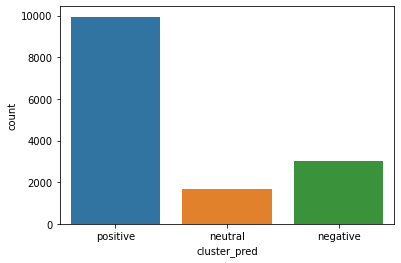

In [ ]:
# showing how many tweets are categorized in "negative", "positive" and "neutral"
countplot(x="cluster_pred", data=df)